<a href="https://colab.research.google.com/github/Elbereth-Elentari/Book_recommender/blob/master/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
cat = pd.read_json('/content/drive/My Drive/Library_catalogue_preprocessed.jl', lines=True, orient='records')

In [4]:
cat.head()

,title,author,storage,WD_signature,publisher,year,pages,language,tokens,interesting
0,Pomiary fizyczne za pomocą komputera : dla stu...,"Jagiełło, Michał (1941-2016).",magazyn,QC39 .P58 1999,Wydaw. Naukowe UAM,9999,238,pl,"[pomiara, fizyczny, pomoc, komputer, student, ...",
1,Poszukiwanie prawdy : uwolnienie od iluzji,"Andrykowski, Janusz (1935- ).",magazyn,DK4133 .L47 1992 t.1,Studio,2021,406,pl,"[poszukiwanie, prawda, uwolnienie, iluzja]",
2,Wielki Pierd : opowiadania historyczne,"Bednarczyk, Ryszard (1953- ).",magazyn,,Drukpol sp.j,2020,146,pl,"[wielki, pierd, opowiadanie, historyczny]",
3,Instrumentalne wszczynanie postępowań karnych ...,"Ladziński, Andrzej.",magazyn,KKP3693 .L337 2020,TNOiK.,2020,122,pl,"[instrumentalny, wszczynanie, postępowanie, ka...",
4,Wszystko nie tak! 2,"Frączyk, Izabella (1970- ).",,PG7206.R335 W793 2020,Prószyński i S,2020,461,pl,[2],


In [ ]:
cat.groupby(by='year').size().reset_index().sort_values(0, ascending=False)[:20]

In [65]:
cat_20_21 = cat[(cat['year'] >= 1900) & (cat['year'] <= 2021)]
years = list(cat_20_21.year.unique())
years.sort()
book_counts = [len(cat[cat['year'] == year]) for year in years]

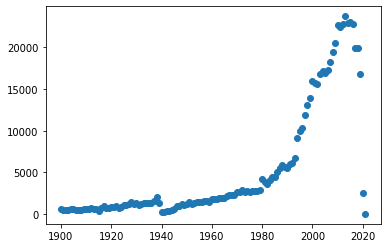

In [79]:
_ = plt.scatter(years, book_counts)

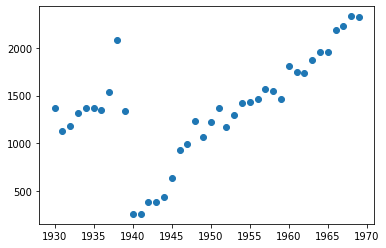

In [67]:
_ = plt.scatter(years[30:70], book_counts[30:70])

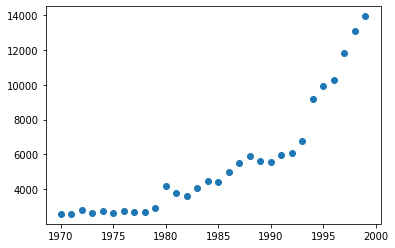

In [68]:
_ = plt.scatter(years[70:100], book_counts[70:100])

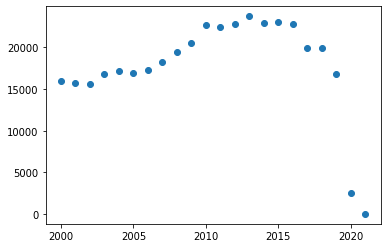

In [69]:
_ = plt.scatter(years[100:], book_counts[100:])

In [77]:
book_lengths = [np.mean(cat[cat['year'] == year]['pages']) for year in years]

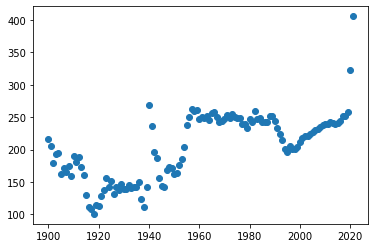

In [78]:
_ = plt.scatter(years, book_lengths)